# Videos and Exercises for Session 2: Data Structuring in Pandas I

In this combined teaching module and exercise set, you will be working with structuring data. 

We will start out with a recap of some basic function and methods that become available in pandas. Then there will be a short intermezzo, where you will be required to think a bit about how to write readible code and make use of the method chaining opportunities that come with python. Then finally, you will get to work with some more advanced data types that are handled natively with pandas. The structure is as follows:
1. Welcome (Back to) Pandas
    - DataFrames and Series
    - Operations with Elementary Data Types in the Context of Pandas
        - Boolean Series
        - String Operations
        - Numeric Operations and Methods
2. Readible Code and Method Chaining
3. More Advanced Data Types
    - Categorical Data
    - Time Series Data
    
**NOTE:** I might be speaking quite slowly in some of the videos. A good advice is to turn up the speed to x1.25 or x1.5 if you want to get through without spending too much time:)

## Packages
Load in the required modules and set up the plotting library:

In [230]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

Wonder what `%matplotlib inline` does? It's not too important for now. However, if you are interested, you can read more about it [here](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline).

# Part 1: Welcome (Back to) Pandas

As mentioned during the lecture, data structuring skills are necessary to become a great data scientist. There is no way around it.

Let's start with the basics. In the first video, we start out by talking about the fundamentals of Pandas: 
- The Pandas DataFrame and the Pandas Series. 
- We then proceed and discuss how indices and colums can be named and selected. 
- Finally, we make some simple operations.

**NOTE:** This is mainly repitition of what you already worked with in assignment 0. If you feel comfortable with this, you should proceed to the associated exercises that will get you warmed up for the rest of this notebook.

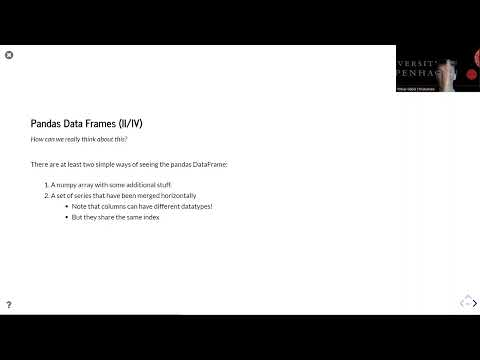

In [231]:
YouTubeVideo('GJ6KAXekvBk', width=640, height=360)

In this set of introductory exercises, we are going to briefly touch upon some of the tools from the video. Again, be aware that there is going to be some repition of the content from assignment 0 here - but these things are all very useful to get under your skin!

> **Ex. 2.1.1**: Run the following two lines below. Explain to yourself what the second line did, and how each entry affected it. In relation to this, what did the first line ensure? When can this be useful? Try and play around with the seed.

In [232]:
np.random.seed(seed=161193)
np_arr=np.round(np.random.exponential(10, size=(10**5,3)),0)
np_arr

array([[ 5.,  0.,  2.],
       [ 4.,  7., 20.],
       [ 1.,  4.,  2.],
       ...,
       [ 1., 25.,  5.],
       [ 1., 47.,  6.],
       [ 4.,  1.,  3.]])

**Answer**: The second line of code sets the seed value for the random number generator in numpy to a specific value, 161193. This is done using the seed() function from the numpy.random module. Setting a seed allows you to generate the same random numbers each time you run the code, which can be useful for reproducibility and debugging purposes.

Now, we want you to investigate how easy it is to go from a numpy `array` to a pandas `DataFrame`. You are going to do something similar to this repeatedly in this course!

> **Ex. 2.1.2**: Create a Pandas DataFrame called `my_df` from `np_arr`:

In [233]:
# Create the Pandas DataFrame
my_df = pd.DataFrame(np_arr, columns=['Column1', 'Column2', 'Column3'])

# Display the DataFrame
print(my_df)


       Column1  Column2  Column3
0          5.0      0.0      2.0
1          4.0      7.0     20.0
2          1.0      4.0      2.0
3          3.0      9.0      4.0
4          5.0      2.0     13.0
...        ...      ...      ...
99995      2.0      7.0     14.0
99996      5.0      3.0      7.0
99997      1.0     25.0      5.0
99998      1.0     47.0      6.0
99999      4.0      1.0      3.0

[100000 rows x 3 columns]


Before we continue working with this DataFrame, we want to make sure that you are capable of transforming it back to different types of containers. This is another very fundamental tool in your data science toolbox.

> **Ex. 2.1.3**: In the following cell, generate an `array`, a `list` and a `dict` from `my_df` (you should be able to do each of these things in one line). Verify that you did this properly by printing your output. Inspect the dictionary: How do you access the value associated with the column index 2 and row index 8543?

In [234]:
# Convert DataFrame to array
array_data = my_df.values

# Convert DataFrame to list
list_data = my_df.values.tolist()

# Convert DataFrame to dictionary
dict_data = my_df.to_dict(orient='list')

# Print
value_8543_column2 = my_df.iloc[8543, 2]
print("Value at column index 2 and row index 8543:", value_8543_column2)


Value at column index 2 and row index 8543: 13.0


A noticeable distiction between pandas dataframes and, say, numpy arrays is the option to label indices and (in particular) columns. This is helpful when working with large sets of data.

> **Ex. 2.1.4**: Going back to the DataFrame `my_df`, we now want you to try the following: 
> 1. Label the columns 'apples', 'bananas' and 'oranges'
> 2. Change the indices to 'cust**x**' where **x** is a sequential numbering of the lines starting from 1 (*hint:* There are many ways to do this, e.g. with a list comprehension!)
> 3. Print the first 10 observations using the `head()` method.

In [235]:
# 1. Label the columns
my_df.columns = ['apples', 'bananas', 'oranges']

# 2. Change the indices to 'custx'
my_df.index = ['cust' + str(x) for x in range(1, len(my_df) + 1)]

# 3. Print the first 10 observations using the head() method
print(my_df.head(10))


        apples  bananas  oranges
cust1      5.0      0.0      2.0
cust2      4.0      7.0     20.0
cust3      1.0      4.0      2.0
cust4      3.0      9.0      4.0
cust5      5.0      2.0     13.0
cust6      2.0      6.0      0.0
cust7     12.0     16.0     14.0
cust8     30.0      5.0     18.0
cust9     21.0      0.0      2.0
cust10    11.0     14.0      1.0


As we saw in the video, we can basically extract a series from a pandas dataframe by simply selecting one column from the dataframe and storing it as a new object.

> **Ex. 2.1.5**: Now, we want you to select only a single column and inspect the output a bit:
> 1. Select 'apples' and store it as 'apples_ser'. Try using the key-based method and the object-based method, respectively. 
> 2. Check the data type. Thinking about our first lines of code, why is it not an `integer`? Convert the data in both 'apples_ser' and 'my_df' to intergers.

In [236]:
# 1. Select 'apples' column using key-based method and object-based method
apples_ser_key = my_df['apples']
apples_ser_obj = my_df.apples

# 2. Check the data type and convert to integers
print("Original data types:")
print("my_df['apples']: ", apples_ser_key.dtype)
print("my_df.apples: ", apples_ser_obj.dtype)

# Convert to integers
apples_ser_key = apples_ser_key.astype(int)
apples_ser_obj = apples_ser_obj.astype(int)
my_df = my_df.astype(int)

print("\nData types after conversion:")
print("my_df['apples']: ", apples_ser_key.dtype)
print("my_df.apples: ", apples_ser_obj.dtype)
print("my_df: ", my_df.dtypes)


Original data types:
my_df['apples']:  float64
my_df.apples:  float64

Data types after conversion:
my_df['apples']:  int64
my_df.apples:  int64
my_df:  apples     int64
bananas    int64
oranges    int64
dtype: object


**Answer**: The reason the 'apples' column is not an integer is because when we initially generated the DataFrame my_df using NumPy's round() function, the data was of type float. To convert it to integer, we used the astype(int) method for both the selected Series (apples_ser_key and apples_ser_obj) and the entire DataFrame my_df. The output will show that the data type for 'apples' in both the Series and DataFrame has been converted to integers.

## Boolean Series

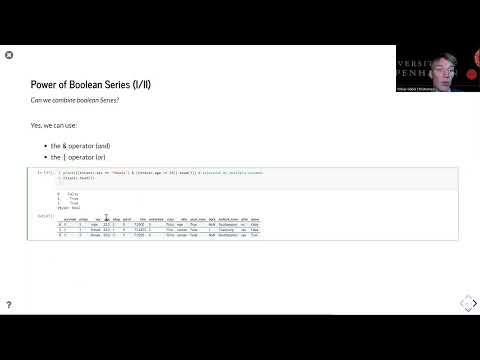

In [237]:
YouTubeVideo('N943L-XFLjU', width=640, height=360)

Boolean 'data' is the simplest data type that we work with. These variables are binary, and basically represent a True or False value. As seen in the video, they become extraordinarily useful when working with pandas series. In particular, boolean series can be applied when we only want to work with certain rows in a dataframe.

> **Ex. 2.1.6**: Drop all rows for which 'Apples' is strictly smaller than 5.

In [238]:
# Find the indices of rows where 'apples' is strictly smaller than 5
rows_to_drop = my_df[my_df['apples'] < 5].index

# Drop the rows with the specified indices
my_df = my_df.drop(index=rows_to_drop)

# Print the modified DataFrame
print(my_df)



           apples  bananas  oranges
cust1           5        0        2
cust5           5        2       13
cust7          12       16       14
cust8          30        5       18
cust9          21        0        2
...           ...      ...      ...
cust99989       5       31       16
cust99990       9       11        2
cust99991      37       17        2
cust99992       7        3       19
cust99997       5        3        7

[63837 rows x 3 columns]


## Numeric Operications and Methods

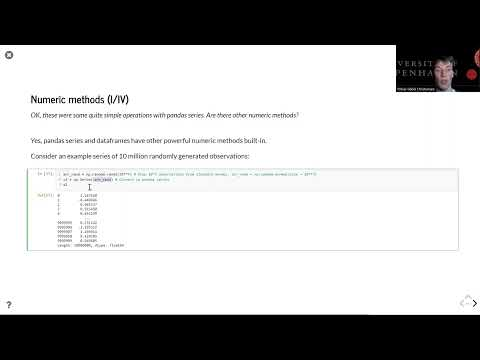

In [239]:
YouTubeVideo('aoCM_s6UObs', width=640, height=360)

As we saw in the video, we can easily make vectorized operations with multiple numpy arrays as well as pandas series and dataframes. This feature can become useful in many cases - in particular, when you have a large set of data and you do not want to make a (computationally exhaustive) loop through all you observation.

> **Ex. 2.1.7**: In this exercise, we want you to make operations on multiple vectors and matrices using a combination of numpy arrays and pandas dataframes.
> 1. Create a numpy array (with 3 elements) of costs associated with different types of fruits. Call this 'price'. Entries should be 1, 4 and 3, respectively.
> 2. Create a new dataframe with information on each costumer's expenses associated with each type of fruit. This should involve multiplying your cost array with the 'my_df'.
> 3. Create a new column called 'Total expenditure' by summing over fruit-specific prices for each customer (*hint:* Learn more about such sum [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)).
> 4. Sort the dataframe by total expenditure, starting with the customer with highest expenditure.

In [240]:
# 1. Create a numpy array of costs associated with different types of fruits
price = np.array([1, 4, 3])

# 2. Create a new dataframe with information on each customer's expenses associated with each type of fruit
customer_expenses = my_df * price

# 3. Create a new column called 'Total expenditure' by summing over fruit-specific prices for each customer
customer_expenses['Total expenditure'] = customer_expenses.sum(axis=1)

# 4. Sort the dataframe by total expenditure in descending order
sorted_customer_expenses = customer_expenses.sort_values(by='Total expenditure', ascending=False)

# Print the resulting sorted DataFrame
print(sorted_customer_expenses)


           apples  bananas  oranges  Total expenditure
cust2459       14      368      180                562
cust12385       9      372      150                531
cust50360      31      300      171                502
cust66559      22      332       93                447
cust36884      44      204      195                443
...           ...      ...      ...                ...
cust45372       5        0        0                  5
cust12524       5        0        0                  5
cust4308        5        0        0                  5
cust70191       5        0        0                  5
cust4190        5        0        0                  5

[63837 rows x 4 columns]


When we have a large data set, it is difficult to get an idea of it's characteristics by simply sorting and printing. In such cases, we much rather want to look at some kinds of descriptive statistics for our data. 

> **Ex. 2.1.8**: In this exercise, we will ask you to use two methods from the video in order to shed some light on the distribution of total expenditure:
> 1. Use `describe()` to get an idea about the distribution of total expenditure in the data set. What does the distance between `mean` and the `50%` quantile tell you about the skewness?
> 2. Use the `cut` method to split the sample into 6 equal sized bins of expenditures from 0 to 600. Find the *share* of observations within each of these bins (we will work more with *categorical data* later in this session).

In [241]:
# 1. Use describe() to get an idea about the distribution of total expenditure in the data set
exp_summary = sorted_customer_expenses['Total expenditure'].describe()
print(exp_summary)

# 2. Use the cut method to split the sample into 6 equal-sized bins of expenditures from 0 to 600
bins = np.linspace(0, 600, 7)
sorted_customer_expenses['Expenditure bins'] = pd.cut(
    sorted_customer_expenses['Total expenditure'], bins=bins, right=False
)

# Find the share of observations within each bin
share_of_observations = sorted_customer_expenses['Expenditure bins'].value_counts(normalize=True).sort_index()
print("\nShare of observations within each bin:")
print(share_of_observations)


count    63837.000000
mean        83.780519
std         50.621702
min          5.000000
25%         47.000000
50%         73.000000
75%        109.000000
max        562.000000
Name: Total expenditure, dtype: float64

Share of observations within each bin:
[0.0, 100.0)      0.700190
[100.0, 200.0)    0.266867
[200.0, 300.0)    0.030296
[300.0, 400.0)    0.002381
[400.0, 500.0)    0.000219
[500.0, 600.0)    0.000047
Name: Expenditure bins, dtype: float64


If the mean is greater than the median, it suggests a right-skewed distribution (positively skewed), while if the mean is less than the median, it suggests a left-skewed distribution (negatively skewed). Therefore, the distribution is right-skewed in this case.

## String Operations

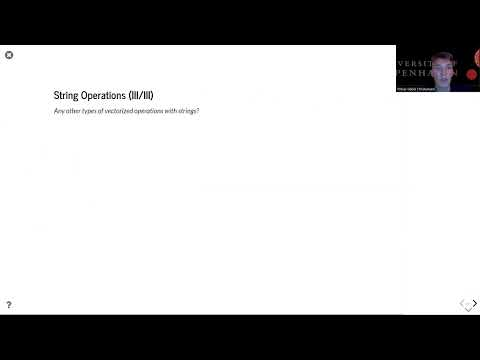

In [242]:
YouTubeVideo('_0AwsOTtouU', width=640, height=360)

Finally, we saw that pandas handles string variable natively. In particular, there is a set of string-specific operations (`.str`) that can be applied to a whole pandas series without having to loop through each row.

> **Ex. 2.1.9**: In this final introductory exercise, we want you to 
> 1. Create a new variable (column) based on the index called 'Customer'. This should capitalize the customer id and write out 'Cust' to 'Customer' (i.e. you should get something similar to 'Customer **x**'). 
> 2. Reset the index.

In [243]:
# 1. Create a new variable (column) based on the index called 'Customer'
sorted_customer_expenses['Customer'] = 'Customer ' + (sorted_customer_expenses.index + 1).astype(str)

# 2. Set the 'Customer' column as the index and remove the old index column
sorted_customer_expenses.set_index('Customer', drop=True, inplace=True)

# Print the modified DataFrame
print(sorted_customer_expenses)



TypeError: can only concatenate str (not "int") to str

# Part 2: Readible Code

Before proceeding to part 3 on advanced data types that are handled natively in pandas, we want you to think a bit about writing readable code. In particular, if we have lots of code, it may be very difficult for others or ourselves to read. Therefore, providing some structure and meta text can help reading the code.

In the following, you will learn about readible code. Then we ask you to use what you learned in order to process the NOAA data from assignment 0. Don't spend too long on this exercise - we are going to use the data for the following exercises.

## Commenting

When making code it's good practice to document different parts of the code. In particular describing functions and complex code. The example below shows how to make multi-line comments (as a string, which is not assigned) and in-line comments using the `#` character.

```python
def my_fct(x,y):
    ''' 
    Computes the sum of input values (multi-line comment as string)
    '''
    z = x+y # Here we perform the summation (in-line comment)
    return z
```


## Method chaining

We can write multiple operations together by putting them one after the other, which is known as `method chaining`. Using this, we only need to assign them once to a new object and therefore we save a lot of code. We change the example below into one using a method chain:

Example without method chain
```python
df_temp1 = df.loc[selection]
df_temp2 = df_temp1.sort_values(by=X)
df_out = df_temp2.reset_index()
```

Example with method chain - one line

```python
df_out = df.loc[selection].sort_values(by=X).reset_index()
```
As seen in the example, although using less code, our method chain will get more and more difficult to read if we include two or more operations. We can overcome this problem of long chains by splitting into multiple lines with line breaks:

Example with method chain - line break
```python
df_out = df\
        .loc[selection]\
        .sort_values(by=X)\
        .reset_index()
```

Note that the backslash allows us to make a visual line break, but the code is read as one line.


## Exercises for Part 2

We continue with the exercise of analyzing NOAA data. We start out reviewing what we did in Assignment 0. 

> **Ex. 2.2.1:** The code below runs through all the steps we completed in Assignment 0.4 step by step. Your task is to document this code in your own words. You should also make your own annotation of parts. In addition, you should make the code more readable by applying method chaining.
> 
>*Hint:* After loading the data and selecting the first four columns, everything can be stated in one method chain! It's OK if you use more, though.

```python
import pandas as pd

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out
```

In [244]:

def load_weather(year):
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    # Load the weather data into a DataFrame, select first four columns, and rename the columns
    df_weather = pd.read_csv(url, header=None).iloc[:, :4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    
    # Convert the 'obs_value' column to Celsius from tenths of Celsius
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    
    # Select only the rows with 'obs_type' equal to 'TMAX' (maximum temperature),
    # then sort the DataFrame by 'station' and 'datetime',
    # and reset the index while dropping the old index
    df_out = df_weather[df_weather['obs_type'] == 'TMAX'] \
        .sort_values(by=['station', 'datetime']) \
        .reset_index(drop=True)
    
    return df_out

load_weather(1863)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6
5506,USW00014838,18630728,TMAX,19.9
5507,USW00014838,18630729,TMAX,25.1
5508,USW00014838,18630730,TMAX,29.4


# Part 3: Advanced Data Types

When you start working with data, you quickly realize that data comes in many different types. 

Some distinctions between data types are obvious to make. For instance, numeric variables should consists of meaningful values that represent something that can be measured (a length, weight, economic value, etc.) with a number. String variables, on the other hand, are variables that *may* also consist of letters and other characters in addition to numbers. And boolean variables are simply binary with only two possible values.

However, we also encounter lots of other data types in applied work within social sciences. Categorical variables can only take a (often quite strictly) limited number of values. And time series data are characterized by being indexed in some time order. In this part, we will explore different these two data types and how you work with them in Pandas.

> **Ex. 2.3.1:** Load the data for year 1863. Extract the area code (country and state) from the station name into a separate column.
>
> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2 letter country/state code, followed by possible additional information on the third character and then an integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/3.8/library/re.html) module. 

In [245]:
import re

# Load the weather data for the year 1863
df_weather_1863 = load_weather(1863)

# Use regular expressions to extract the area code (country and state) from the 'station' column
df_weather_1863['area_code'] = df_weather_1863['station'].apply(lambda x: re.match(r'^([A-Za-z]{2})', x).group(1))

# Print the DataFrame with area code included
df_weather_1863

,station,datetime,obs_type,obs_value,area_code
0,AGE00135039,18630102,TMAX,11.5,AG
1,AGE00135039,18630103,TMAX,11.0,AG
2,AGE00135039,18630105,TMAX,15.5,AG
3,AGE00135039,18630106,TMAX,16.5,AG
4,AGE00135039,18630107,TMAX,15.0,AG
...,...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6,US
5506,USW00014838,18630728,TMAX,19.9,US
5507,USW00014838,18630729,TMAX,25.1,US
5508,USW00014838,18630730,TMAX,29.4,US


## Categorical Data

Pandas has built-in features for working specifically with categorical data. In the video below, we will discuss how you can think about categorical data, and how you can efficiently work with it in pandas.

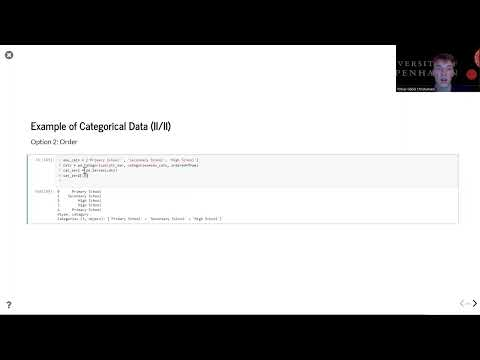

In [246]:
YouTubeVideo('rdvaomti5TM', width=640, height=360)

Having watched the video introducing categorical data, we now want you to try and work with it.

> **Ex. 2.3.2:** Do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [247]:
# INCLUDED IN ASSIGNMENT 1

In [248]:
# INCLUDED IN ASSIGNMENT 1

In [249]:
# 1. Convert the 'area' column to a categorical variable
df_weather_1863['area_code'] = df_weather_1863['area_code'].astype('category')

# 2. Transform the 'obs_value' column from continuous to categorical variable using pd.qcut()
quantiles = [0, 0.1, 0.9, 1]
df_weather_1863['obs_value_cat'] = pd.qcut(df_weather_1863['obs_value'], q=len(quantiles)-1)

# 3. Make another column with 'obs_value' as a categorical variable with labels "cold", "medium", "hot"
labels = ['cold', 'medium', 'hot']
df_weather_1863['obs_value_cat_labeled'] = pd.qcut(df_weather_1863['obs_value'], q=len(quantiles)-1, labels=labels)

# Print the DataFrame with the added columns
print(df_weather_1863)

          station  datetime obs_type  obs_value area_code    obs_value_cat  \
0     AGE00135039  18630102     TMAX       11.5        AG  (-15.001, 12.6]   
1     AGE00135039  18630103     TMAX       11.0        AG  (-15.001, 12.6]   
2     AGE00135039  18630105     TMAX       15.5        AG     (12.6, 19.5]   
3     AGE00135039  18630106     TMAX       16.5        AG     (12.6, 19.5]   
4     AGE00135039  18630107     TMAX       15.0        AG     (12.6, 19.5]   
...           ...       ...      ...        ...       ...              ...   
5505  USW00014838  18630727     TMAX       20.6        US     (19.5, 49.4]   
5506  USW00014838  18630728     TMAX       19.9        US     (19.5, 49.4]   
5507  USW00014838  18630729     TMAX       25.1        US     (19.5, 49.4]   
5508  USW00014838  18630730     TMAX       29.4        US     (19.5, 49.4]   
5509  USW00014838  18630731     TMAX       25.6        US     (19.5, 49.4]   

     obs_value_cat_labeled  
0                     cold  
1    

## Time Series Data

Our coverage of basic Python did not include time. This is another elementary datatypes, that has its own native structure or maybe converted to an integer using a smart method. See more below.

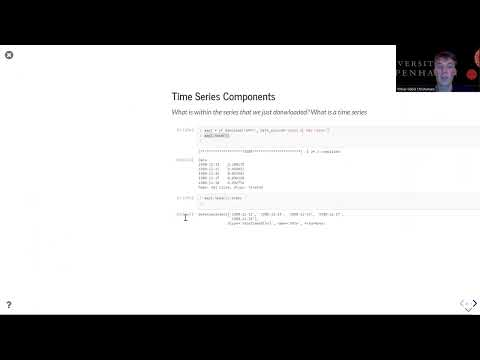

In [250]:
YouTubeVideo('wrLAYxAGZIY', width=640, height=360)

> **Ex. 2.3.3:** Convert the date formated as string to datetime. Call this column `datetime_dt`. Make a new column named `month` with the month for each observation. Set the datetime variable as temporal index. 
>
> *Hint:* Look up `.set_index()` setting the index.

In [302]:
from datetime import datetime

# Define a custom date parser function
def custom_date_parser(date_str):
    # The format of the date is "yyyymmdd"
    return datetime.strptime(date_str, '%Y%m%d')

# Convert 'datetime' column to strings
df_weather_1863['datetime'] = df_weather_1863['datetime'].astype(str)

# Convert 'datetime' column to datetime format using custom date parser
df_weather_1863['datetime_dt'] = df_weather_1863['datetime'].apply(custom_date_parser)

# Create a new column 'month' containing the month for each observation
df_weather_1863['month'] = df_weather_1863['datetime_dt'].dt.month

# Set 'datetime_dt' as the temporal index
df_weather_1863.set_index('datetime_dt', inplace=True)

# Print the DataFrame with the added columns and the temporal index
print(df_weather_1863)

                 station  datetime obs_type  obs_value  month area_code
datetime_dt                                                            
1863-01-02   AGE00135039  18630102     TMAX       11.5      1        AG
1863-01-03   AGE00135039  18630103     TMAX       11.0      1        AG
1863-01-05   AGE00135039  18630105     TMAX       15.5      1        AG
1863-01-06   AGE00135039  18630106     TMAX       16.5      1        AG
1863-01-07   AGE00135039  18630107     TMAX       15.0      1        AG
...                  ...       ...      ...        ...    ...       ...
1863-07-27   USW00014838  18630727     TMAX       20.6      7        US
1863-07-28   USW00014838  18630728     TMAX       19.9      7        US
1863-07-29   USW00014838  18630729     TMAX       25.1      7        US
1863-07-30   USW00014838  18630730     TMAX       29.4      7        US
1863-07-31   USW00014838  18630731     TMAX       25.6      7        US

[5510 rows x 6 columns]


> **Ex. 2.3.4:** Update your annotated function above with processing of area and temporal data.          

In [303]:
# INCLUDED IN ASSIGNMENT 1

In [310]:
def load_weather(year):
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    # Load the weather data into a DataFrame, select first four columns, and rename the columns
    df_weather = pd.read_csv(url, header=None).iloc[:, :4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    
    # Convert the 'obs_value' column to Celsius from tenths of Celsius
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    
    # Select only the rows with 'obs_type' equal to 'TMAX' (maximum temperature),
    # then sort the DataFrame by 'station' and 'datetime',
    # and reset the index while dropping the old index
    df_out = df_weather[df_weather['obs_type'] == 'TMAX'] \
        .sort_values(by=['station', 'datetime']) \
        .reset_index(drop=True)
    
    # Use regular expressions to extract the area code (country and state) from the 'station' column
    df_out['area_code'] = df_out['station'].apply(lambda x: re.match(r'^([A-Za-z]{2})', x).group(1))
    
    # Convert 'datetime' column to strings
    df_out['datetime'] = df_out['datetime'].astype(str)
    
    # Convert 'datetime' column to datetime format using custom date parser
    df_out['datetime_dt'] = df_out['datetime'].apply(custom_date_parser)
    
    # Create a new column 'month' containing the month for each observation
    df_out['month'] = df_out['datetime_dt'].dt.month
    
    # Set 'datetime_dt' as the temporal index
    df_out.set_index('datetime_dt', inplace=True)
    
    return df_out

# Call the function to load the weather data for the year 1863
df_weather_1863 = load_weather(1863)

# Print the DataFrame with the added columns and the temporal index
print(df_weather_1863)

#Føler lidt det her er overflødigt, da det allerede er gjort længere oppe 

                 station  datetime obs_type  obs_value area_code  month
datetime_dt                                                            
1863-01-02   AGE00135039  18630102     TMAX       11.5        AG      1
1863-01-03   AGE00135039  18630103     TMAX       11.0        AG      1
1863-01-05   AGE00135039  18630105     TMAX       15.5        AG      1
1863-01-06   AGE00135039  18630106     TMAX       16.5        AG      1
1863-01-07   AGE00135039  18630107     TMAX       15.0        AG      1
...                  ...       ...      ...        ...       ...    ...
1863-07-27   USW00014838  18630727     TMAX       20.6        US      7
1863-07-28   USW00014838  18630728     TMAX       19.9        US      7
1863-07-29   USW00014838  18630729     TMAX       25.1        US      7
1863-07-30   USW00014838  18630730     TMAX       29.4        US      7
1863-07-31   USW00014838  18630731     TMAX       25.6        US      7

[5510 rows x 6 columns]


> **Ex. 2.3.5:** Make a timeseries plot for the station called `AGE00135039`.
>
> _Hint:_ for this you need to know a few methods of the pandas Series objects, for instance `.plot()`. 

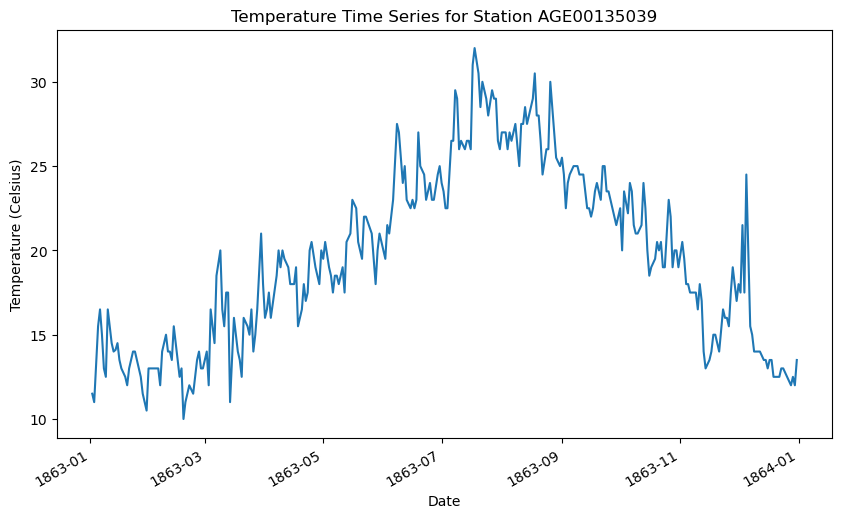

In [313]:
# Select data for the specific station 'AGE00135039'
station_data = df_weather_1863.loc[df_weather_1863['station'] == 'AGE00135039']

# Create a timeseries plot
station_data['obs_value'].plot(figsize=(10, 6), title='Temperature Time Series for Station AGE00135039')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()
